In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [22]:
data.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2447,22,Male,Computer Science,1,7,0,0,0
1230,21,Male,Mechanical,1,7,1,0,0
1561,21,Male,Information Technology,0,8,0,1,1
2692,21,Male,Information Technology,1,8,0,1,1
515,22,Female,Computer Science,1,7,1,0,0


In [23]:
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  2966
Number of Columns:  8


In [24]:
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [26]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
print(data)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22       1  Electronics And Communication            1     8       1   
1      21       0               Computer Science            0     7       1   
2      22       0         Information Technology            1     6       0   
3      21       1         Information Technology            0     8       0   
4      22       1                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23       1         Information Technology            0     7       0   
2962   23       1                     Mechanical            1     7       1   
2963   22       1         Information Technology            1     7       0   
2964   22       1               Computer Science            1     7       0   
2965   23       1                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

In [27]:
Stream_mapping = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Mechanical': 2,
    'Civil': 3,
    'Information Technology': 4,
    'Electrical': 5
}

data['Stream'] = data['Stream'].map(Stream_mapping)
print(data)

      Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs  \
0      22       1       0            1     8       1                  1   
1      21       0       1            0     7       1                  1   
2      22       0       4            1     6       0                  0   
3      21       1       4            0     8       0                  1   
4      22       1       2            0     8       1                  0   
...   ...     ...     ...          ...   ...     ...                ...   
2961   23       1       4            0     7       0                  0   
2962   23       1       2            1     7       1                  0   
2963   22       1       4            1     7       0                  0   
2964   22       1       1            1     7       0                  0   
2965   23       1       3            0     8       0                  0   

      PlacedOrNot  
0               1  
1               1  
2               1  
3               1  

In [28]:
data.count()

Age                  2966
Gender               2966
Stream               2966
Internships          2966
CGPA                 2966
Hostel               2966
HistoryOfBacklogs    2966
PlacedOrNot          2966
dtype: int64

In [29]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [30]:
data.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

In [31]:
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r2_score 0.340064217359496
MAE 0.3397448678207232


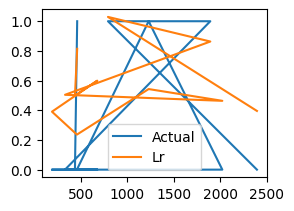

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn import metrics
import matplotlib.pyplot as plt


lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1})

score1= metrics.r2_score(y_test,y_pred1)
s1= metrics.mean_absolute_error(y_test,y_pred1)
print("r2_score",score1)
print("MAE",s1)




plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()


In [34]:
data.columns


Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [35]:
data['Internships'].unique()
data['CGPA'].unique()
data['CGPA'].unique()
data['HistoryOfBacklogs'].unique()

array([1, 0], dtype=int64)

In [36]:
from joblib import dump

In [37]:
dump(lr,'./../savedmodels/lr.joblib')

['./../savedmodels/lr.joblib']